In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas_datareader.data as web
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Importing CPI data

* seasonally_adjusted

In [6]:
start = dt.datetime(1950, 1, 1)
end = dt.datetime(2023, 1, 1)

cpi_annual = web.DataReader('FPCPITOTLZGUSA', 'fred', start, end)
from pathlib import Path  
filepath = Path('folder/subfolder/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
cpi_annual.to_csv(filepath) 
cpi_annual = pd.read_csv(filepath, parse_dates=True)
cpi_annual['DATE'] = pd.to_datetime(cpi_annual['DATE'])
cpi_annual.set_index("DATE", inplace=True)
cpi_annual

,FPCPITOTLZGUSA
DATE,
1960-01-01,1.457976
1961-01-01,1.070724
1962-01-01,1.198773
1963-01-01,1.239669
1964-01-01,1.278912
...,...
2017-01-01,2.130110
2018-01-01,2.442583
2019-01-01,1.812210


## Preliminary Data Exploration
* Looking at the shape of the data
* Checking for NaN values or duplicated values

In [7]:
print(cpi_annual.shape)
dup_cpi = cpi_annual.duplicated().values.any()
NaN_cpi = cpi_annual.isna().values.any()
print(f"Are there any duplicated data? {dup_cpi}")
print(f"Are there any NaN present? {NaN_cpi}")

(62, 1)
Are there any duplicated data? False
Are there any NaN present? False


## Importing SP500 data

In [59]:
sp500 = yf.Ticker("^GSPC").history(period="max")

## Preliminary Data Exploration
* Looking at the shape of the data
* Checking for NaN values or duplicated values

In [60]:
print(sp500.shape)
dup_sp500 = sp500.duplicated().values.any()
NaN_sp500 = sp500.isna().values.any()
print(f"Are there any duplicated data? {dup_sp500}")
print(f"Are there any NaN present? {NaN_sp500}")

(23905, 7)
Are there any duplicated data? True
Are there any NaN present? False


## Removing duplicated data


In [61]:
sp500_clean = sp500.drop_duplicates()

## Creating annual return for SP500



In [62]:
annual_data_list = []
year_list = sp500_clean.index.year.unique()

for year in year_list:
    last_day_data = sp500_clean[sp500_clean.index.year == year].tail(1)
    annual_data_list.append(last_day_data)
    
sp500_annual = pd.concat(annual_data_list)
sp500_annual_performance = sp500_annual[["Close"]] / sp500_annual[["Close"]].shift(1) * 100 - 100
sp500_annual_performance.index = pd.to_datetime(sp500_annual_performance.index.strftime("%Y"))


In [63]:
sp500_annual_performance = sp500_annual_performance.dropna()

## Plotting CPI vs SP500 annual return

* Look for trends across the years between CPI change and SP500 returns


* From the graph, we can see that there were two times where SP500 returned more than 25% negative.


* In 1973-1974, there were multiple things that affected USA economy such as, inflation as seen by the increase of CPI percentage from 3% to 12%, together with recession and the ongoing energy crisis that occured in that time period all led up to SP500 returns being negative for 1973-1974


* In 2008 we can see a very large negative annual return for SP500, the CPI rose but not as much as during 1973-1974. The reason for the negative return was due to the financial crisis of 2008. 


* Data in 2008 would prove that even if CPI drops, stock prices might not go up.


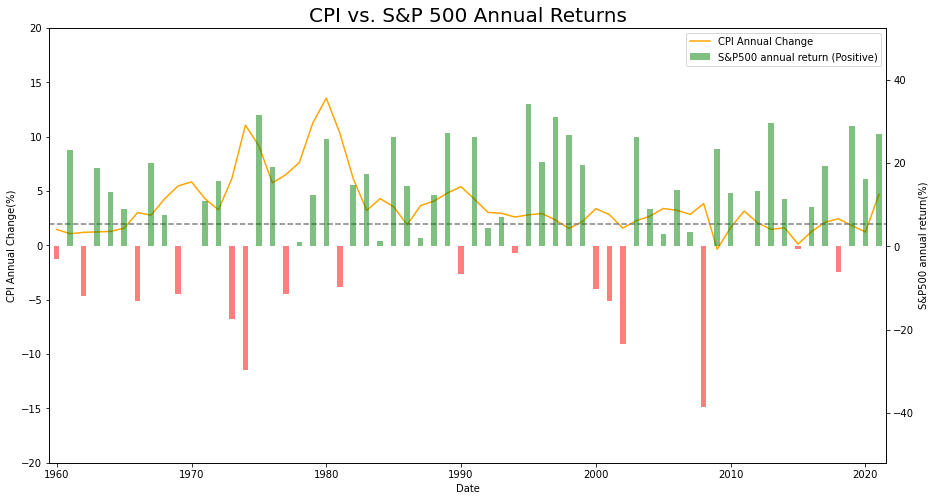

In [64]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

ax1.plot(cpi_annual, color="orange", label="CPI Annual Change")

colors = np.where(sp500_annual_performance['Close'] < 0, 'red', 'green')

ax2.bar(sp500_annual_performance.index, sp500_annual_performance["Close"],
        color=colors, alpha=0.5, width = 150, label="S&P500 annual return (Positive)")

ax1.axhline(2, color='gray', linestyle='--')

plt.tick_params(labelsize=10) 
plt.title("CPI vs. S&P 500 Annual Returns", fontsize=20)

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2)

ax1.set_xlabel("Date")
ax1.set_ylabel("CPI Annual Change(%)")
ax2.set_ylabel("S&P500 annual return(%)")

ax1.set_ylim([-20, 20])
# earliest date - 200 days
# latest daate + 600 days
ax1.set_xlim([min(cpi_annual.index) - dt.timedelta(days=200),
              max(cpi_annual.index) + dt.timedelta(days=200)])
plt.show()

## Interest rates vs SP500 monthly returns


In [65]:
interest_annual_rate = pd.read_csv("Downloads/T10Y2Y.csv", index_col="DATE", parse_dates=True)
interest_annual_rate

,T10Y2Y
DATE,
1977-01-01,0.968635
1978-01-01,0.075524
1979-01-01,-0.677137
1980-01-01,-0.298320
1981-01-01,-0.653133
1982-01-01,0.204578
1983-01-01,0.894160
1984-01-01,0.787831
1985-01-01,1.352097


## Plotting Interest Rate vs SP500 returns

* From the graph, it can be seen that when interest rate drops, the stock prices will generally rise 

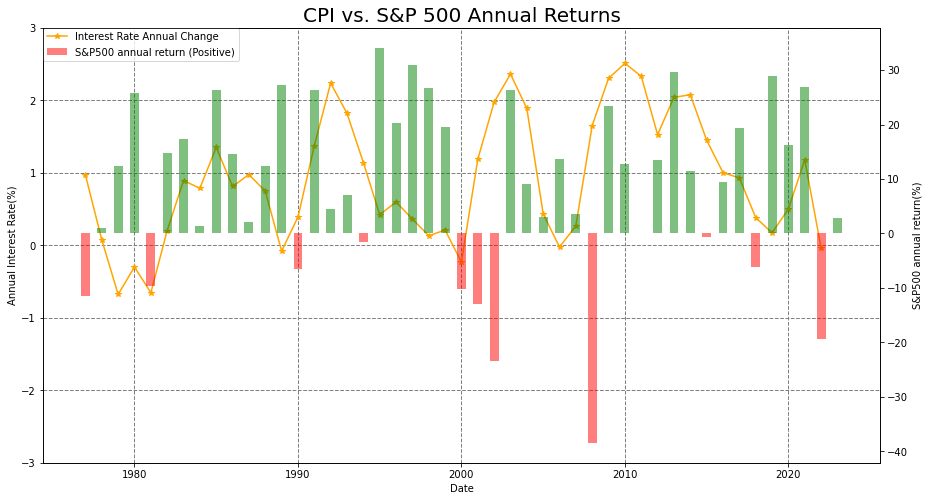

In [66]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

ax1.plot(interest_annual_rate, marker = '*',
         color="orange", label="Interest Rate Annual Change")

colors = np.where(sp500_annual_performance['Close'].loc["1977":] < 0, 'red', 'green')

ax2.bar(sp500_annual_performance.loc["1977":].index, sp500_annual_performance["Close"].loc["1977":],
        color=colors, alpha=0.5, width= 200, label="S&P500 annual return (Positive)")

ax1.grid(color = 'gray', linestyle = '--', linewidth = 1)
plt.tick_params(labelsize=10) 
plt.title("CPI vs. S&P 500 Annual Returns", fontsize=20)

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)

ax1.set_xlabel("Date")
ax1.set_ylabel("Annual Interest Rate(%)")
ax2.set_ylabel("S&P500 annual return(%)")

ax1.set_ylim([-3, 3])
plt.show()

## Removing unwanted columns/features

* Using the same sp500 data from earlier

In [68]:
del sp500["Dividends"]
del sp500["Stock Splits"]

## Creating the target column to train and test

In [69]:
sp500["Pre_close"] = sp500["Close"].shift(1)

In [70]:
sp500 = sp500.loc["2010":]

In [71]:
sp500 = sp500.dropna()

## Using only recent data as data from too many years ago might not be suitable

* Use data over 1 trading year to test the model

In [72]:
X = sp500.drop(["Close"], axis=1).values
y = sp500["Close"]

num = 250

X_train = X[:-1*num]
y_train = y[:-1*num]
X_test = X[-1*num:]
y_test = y[-1*num:]

model = LinearRegression()
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [73]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3062, 5) (250, 5) (3062,) (250,)


## Evaluting our model

* Root mean square error (RMSE) is the standard deviation of the residuals. The lower the value of RMSE, the better the performance.
* R Square is a good measure to determine how well the model fits the dependent variables. The maximum value is 1.0, the higher the R square, the better the model fit
* Mean Square Error is an absolute measure of the fit of model, it’s result gives us how much deviation from actual number. The lower the MSE value, the higher the prediction accuracy.

In [74]:
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predictions), 4))
print("Mean Sqaured Error:", metrics.mean_squared_error(y_test, predictions))


Root Mean Squared Error: 18.8723
(R^2) Score: 0.9931
Mean Sqaured Error: 356.1631831891537


## Creating new features for the data

* Using stock indicators for our features

* Some good indicators to look at includes, 
1. Simple Moving Average(SMA) 
2. Expotiential Moving Average (EMA) 
3. Moving Average Convergence Divergence (MACD) the value of an exponential moving average (EMA) subtracted from another EMA with a shorter lookback period.
4. Relative Strength Index (RSI)

In [75]:
# SMA Indicators    
sp500["5SMA"] = sp500["Pre_close"].rolling(5).mean()
sp500["10SMA"] = sp500["Pre_close"].rolling(10).mean()
sp500["20SMA"] = sp500["Pre_close"].rolling(20).mean()
sp500["50SMA"] = sp500["Pre_close"].rolling(50).mean()
sp500["100SMA"] = sp500["Pre_close"].rolling(100).mean()
sp500["200SMA"] = sp500["Pre_close"].rolling(200).mean()

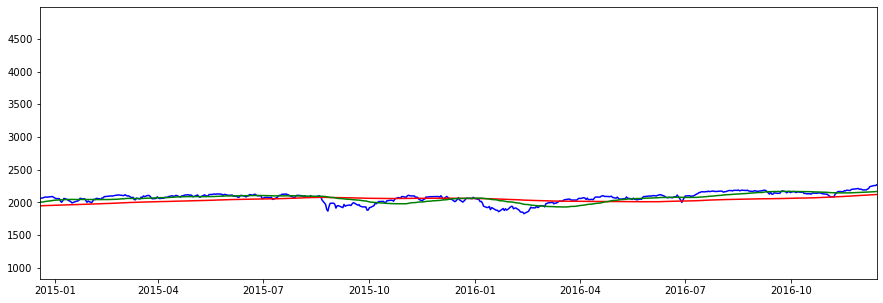

In [76]:
# plot SMA against stock data

plt.figure(figsize=(15,5))
plt.plot(sp500.index , sp500["Pre_close"], color="blue")
plt.plot(sp500.index, sp500["200SMA"], color="red")
plt.plot(sp500.index, sp500["50SMA"], color="green")
plt.xlim(sp500.index[1250], sp500.index[1750])

plt.show()

# We can see the general trend of the sp500 price across the years
# With 50 SMA, the trend will follow closer to the price, when 50SMA is above 200 SMA, indicates the start of a long-term uptrend

In [77]:
#EMA indicators

# ema for period = 12
def cal_macd (data, len1, len2, len3):
    short = data["Pre_close"].ewm(span=len1,adjust=False, min_periods=len1).mean()
# ema for period = 26
    long = data["Pre_close"].ewm(span=len2, adjust=False, min_periods=len2).mean()
# calculate Macd
    macd = short - long
    macd_s = macd.ewm(span=len3, adjust=False, min_periods=len3).mean()
    
    return macd, macd_s

In [78]:
Macd, signal = cal_macd(sp500, 12, 26, 9)
sp500["Macd"] = Macd
sp500["Signal"] = signal

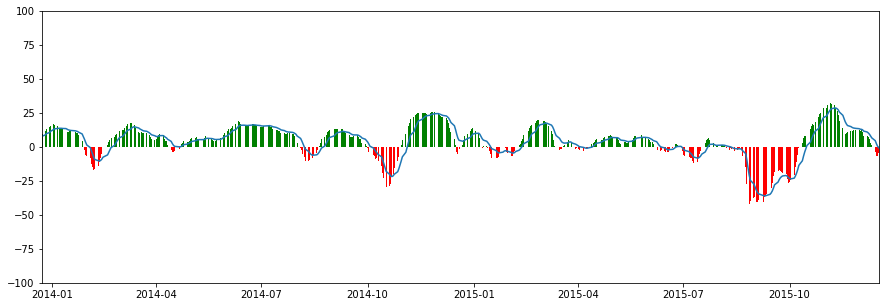

In [79]:
#plot MACD and the signal

plt.figure(figsize=(15,5))

colors = np.where(sp500['Macd'] < 0, 'red', 'Green')
plt.bar(sp500.index, sp500["Macd"],color=colors)
plt.plot(sp500.index, sp500["Signal"])
plt.xlim(sp500.index[1000], sp500.index[1500])
plt.ylim(-100, 100)
plt.show()

In [80]:
## RSI indicator
## Will tell us whether a stock is overbought or oversold

def rsi(data, periods, ema = True):
    
    delta = data.diff()
    
    # Make two series: one for lower closes and one for higher closes
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    
    ma_up = up.ewm(com = periods - 1, adjust=False).mean()
    ma_down = down.ewm(com = periods - 1, adjust=False).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [81]:
sp500["RSI"] = rsi(sp500["Pre_close"], 14)

In [82]:
sp500 = sp500.fillna(0)

In [83]:
model = LinearRegression()

X = sp500.drop(["Close"], axis=1).values
y = sp500["Close"]

num = 250

X_train = X[:-1*num]
y_train = y[:-1*num]
X_test = X[-1*num:]
y_test = y[-1*num:]

model = model.fit(X_train, y_train)
preds = model.predict(X_test)

In [84]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3062, 14) (250, 14) (3062,) (250,)


In [85]:
print("Mean Sqaured Error:", metrics.mean_squared_error(y_test, preds))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, preds)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, preds), 4))

Mean Sqaured Error: 356.24781610302006
Root Mean Squared Error: 18.8745
(R^2) Score: 0.9931


## Using the model to make trades

* Model will make a trade if it thinks that the closing price for that day is higher than opening price on the same day

* We will use it to compare against buying and holding sp500 for a year to see which one yields higher profit



In [80]:
def test (opens, closes, preds, start_account=1000, thresh=0):
    account = start_account
    changes = []
    
    for i in range(len(preds)):
        if (preds[i]-opens[i]/opens[i]) >= thresh:
            account += account*(closes[i]-opens[i])/opens[i]

        changes.append(account)
    
    plt.figure(figsize=(15,5))
    plt.plot(closes.index, changes)
    plt.title("Account balance over 365 trading days")
    plt.xlabel("Date")
    plt.ylabel("Account amount")
    plt.show()
    
    invest_total = start_account + start_account * (closes[-1]-opens[0])/opens[0]
    print("Investing amount:", invest_total, str(round((invest_total-start_account)/start_account*100,1))+ "%")
    print("Algo Trading Total:", account, str(round((account-start_account)/start_account*100,1))+ "%")


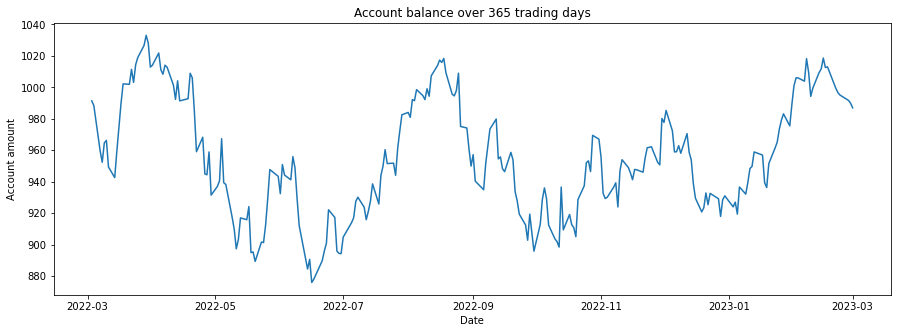

Investing amount: 897.7758530923909 -10.2%
Algo Trading Total: 986.9674647595431 -1.3%


In [81]:
test(X_test.T[0], y_test, preds, 1000, 0)

# Prediction using hourly data

In [83]:
sp500_hourly = yf.Ticker("^GSPC")
sp500_hourly = sp500_hourly.history(start="2022-1-1", interval="1h")

In [84]:
sp500_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2033 entries, 2022-01-03 09:30:00-05:00 to 2023-03-01 15:30:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2033 non-null   float64
 1   High          2033 non-null   float64
 2   Low           2033 non-null   float64
 3   Close         2033 non-null   float64
 4   Volume        2033 non-null   int64  
 5   Dividends     2033 non-null   float64
 6   Stock Splits  2033 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.1 KB


In [85]:
sp500_hourly.duplicated().values.any()
sp500_hourly.isna().values.any()

False

In [86]:
del sp500_hourly["Dividends"]
del sp500_hourly["Stock Splits"]

In [87]:
sp500_hourly["Pre_close"] = sp500_hourly["Close"].shift(1)

In [88]:
sp500_hourly.dropna(inplace=True)

In [89]:
model = LinearRegression()

X = sp500_hourly.drop(["Close"], axis=1).values
y = sp500_hourly["Close"]

num = 250

X_train = X[:-1*num]
y_train = y[:-1*num]
X_test = X[-1*num:]
y_test = y[-1*num:]

model = model.fit(X_train, y_train)
predicts = model.predict(X_test)

In [91]:
print("Mean Sqaured Error:", metrics.mean_squared_error(y_test, predicts))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predicts)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predicts), 4))

Mean Sqaured Error: 37.465165985723566
Root Mean Squared Error: 6.1209
(R^2) Score: 0.9934
